In [1]:
# Import libraries needed for notebook
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import random as rnd

In [2]:
def retrieve_data(csv_file, game_title):
    """
        Read the data in the csv file and store it in a dictionary.
        
        Parameters
        ----------
        csv_file : str
        game_title : str
        
        Returns
        -------
        channel_dict
            A dictionary containing the channel and number of times
    """
    channel_dict = {}
    reader_list = []
    
    # Open the csv file and store into a list
    with open(csv_file, 'r') as fp:
        reader = csv.reader(fp)
        for row in reader:
            reader_list.append(row)
        
    # For each line in the list
    for row in reader_list:
        
        # Retrieve the channel id from the line
        line_str = str(row).split(';')
        channel_name = line_str[3]
        channel_count = 0
        game_dict = {}
        
        # If the channel id is not a key in the dictionary, do the following
        if channel_name not in channel_dict:
            
            # Calculate how many times a channel id appears in the game list
            for row1 in reader_list:
                if channel_name in str(row1):
                    channel_count += 1
                    
            # Insert the game title and count to the dictionary
            game_dict[game_title] = channel_count
            channel_dict[channel_name] = game_dict
            
    return channel_dict

In [3]:
def update_dict(dict1, dict2):
    """
        Updates the dictionary by adding 
        
        Parameters
        ----------
        dict1 : dict
        dict2 : dict
        
        Returns
        -------
        dict1
    """
    
    # Get the list of keys from the second dictionary
    keys_list = list(dict2.keys())
    
    for key in keys_list:
        # If the key exists in the first dictionary, add the value from the second dictionary to it
        if key in dict1:
            # Get the current inner dictionary from dict1
            curr_list = dict1.get(key)
            curr_list.update(dict2.get(key))
            
            # Add the updated list back into dict1
            dict1[key] = curr_list
        
        # Else, make it a new key in the first dictionary
        else:
            dict1[key] = dict2.get(key)
            
    return dict1

In [6]:
def generate_networks(game_dict, game_title):
    """
        Generate the graph using the data
        
        Parameters
        ----------
        game_dict : dict
        game_title : str
    """
    # Create empty graph and add game node to graph
    G = nx.Graph()
    G.add_node(game_title)
    count = 0
    
    node_list = G.nodes()
    channel_list = list(game_dict.keys())
    
    # Add 20 nodes to the graph
    while count < 20:
        channel = rnd.choice(channel_list)
        
        # Keep choosing a channel if it's already in the graph or it doesn't have videos for the game
        while channel not in node_list and game_dict[channel].get(game_title) != None:
            channel = rnd.choice(channel_list)
            
        # Add the channel to the network and add edge
        G.add_node(channel)
        G.add_edge(channel, game_title)
        
        # Increment count
        count += 1
    
    # Draw the network
    plt.subplot()
    nx.draw(G, node_size=100, with_labels=True, pos=nx.spring_layout(G, k=0.15,iterations=20))
    plt.show()

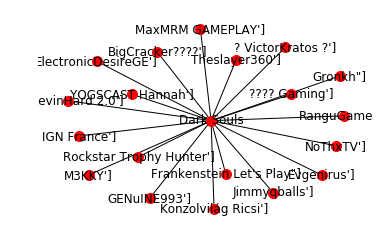

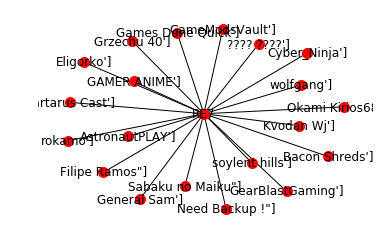

In [9]:
# Test function
return_dict = {}
re7_dict = retrieve_data('re7_v2.csv', "RE7")
return_dict.update(re7_dict)
ds_dict = retrieve_data('darksouls_v1.csv', "Dark Souls")
return_dict = update_dict(return_dict, ds_dict)
generate_networks(return_dict, "Dark Souls")
generate_networks(return_dict, "RE7")